In [3]:
import sys
import json
import pandas as pd
import numpy as np
sys.path.append("..")
from src.utils_methods import encode, get_var_metadata, post_process, transform_df_to_json, generate_plots, check_constraints

In [4]:
import json
FOLDERS = ["vae", "dgmm", "llm"]

with open("number_of_instances_100.json") as f:
    results_out = json.load(f)
# with open("number_of_instances_1000.json") as f:
#     results_out1 = json.load(f)

# results_out.update(results_out1)
results_out = {int(key): value for key, value in results_out.items()}

better_names = {"RF":"Random Forest", "DT":"Decission Tree", "CBR": "CatBoost", "vae":"TVAE", "llm":"LLM", "dgmm":"MDGMM"}
seeds_all = [int(x) for x in list(results_out.keys())]
problems_used = []
for values in results_out.values():
    model_names = list(values.keys())
    for i, model_name in enumerate(model_names):
        problems_used.append({})
        problems_used[i]["model_name"] = model_name
    break

In [5]:
numbers_all = [int(x) for x in set(seeds_all)]
numbers_all.sort()


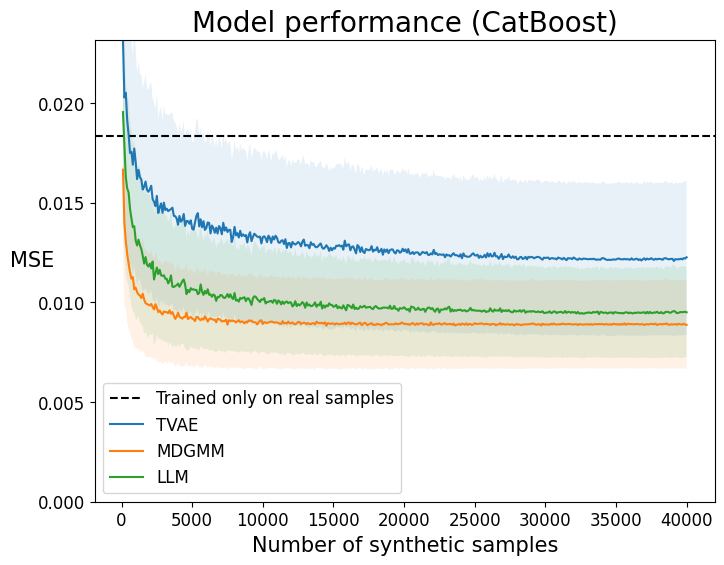

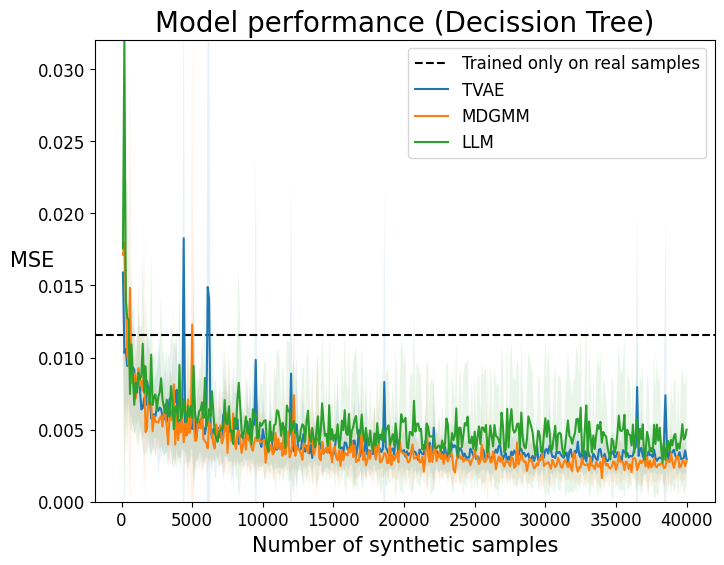

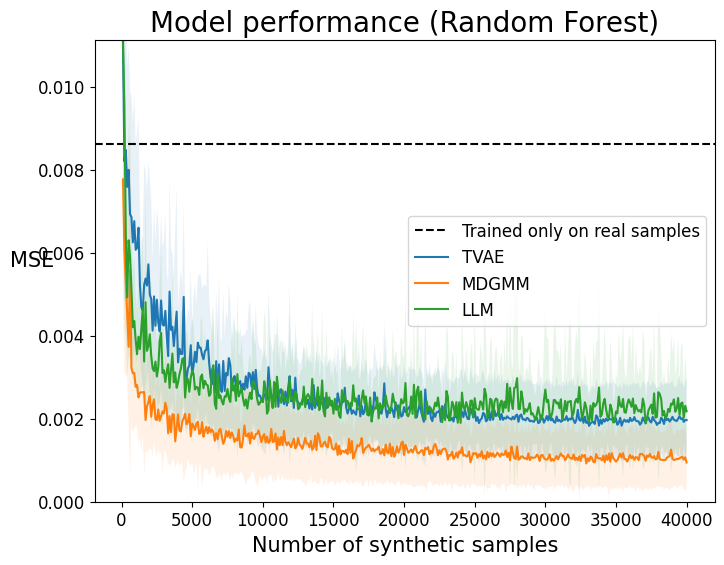

In [6]:
import matplotlib.pyplot as plt

metrics_names = {"MSE": "MSE", "R2": r"$R^2$"}

metric_plot = "MSE"
generation_methods = FOLDERS

def get_plot_list(results_out, generation_method, model_name, metric, number_order):
    average_list = []
    std_list= []
    for number in number_order:
        # print(number)
        # print(json.dumps(results_out[str(number)], sort_keys=True, indent=4))
        # break

        average_list.append(results_out[number][model_name][metric][generation_method]["average"])
        std_list.append(results_out[number][model_name][metric][generation_method]["std"])
    return np.array(average_list), np.array(std_list)


for i in range(len(problems_used)):
    model_name = problems_used[i]["model_name"]
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.title("Model performance ({})".format(better_names[model_name]), fontsize=20)
    real_average, real_std = get_plot_list(results_out, "real", model_name, metric_plot, numbers_all)
    plt.axhline(y = real_average[0], color = 'black', linestyle = '--', label="Trained only on real samples") 
    max_average = max(real_average)

    for generation_method in generation_methods:
        synthetic_average, synthetic_std = get_plot_list(results_out, generation_method, model_name, metric_plot, numbers_all)
        plt.plot(numbers_all, synthetic_average, label=better_names[generation_method])
        max_average = max(max_average, max(synthetic_average))
        # Plot the shaded region for mean ± std
        plt.fill_between(numbers_all, synthetic_average - synthetic_std, synthetic_average + synthetic_std, alpha=0.1)

    plt.ylim(0, max_average)
    plt.xlabel("Number of synthetic samples", fontsize=15)
    plt.ylabel(metrics_names[metric_plot], fontsize=15, rotation=0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)    
    plt.savefig("model_performance_{}.png".format(better_names[model_name]), dpi=300, bbox_inches="tight", pad_inches=0)
    plt.show()


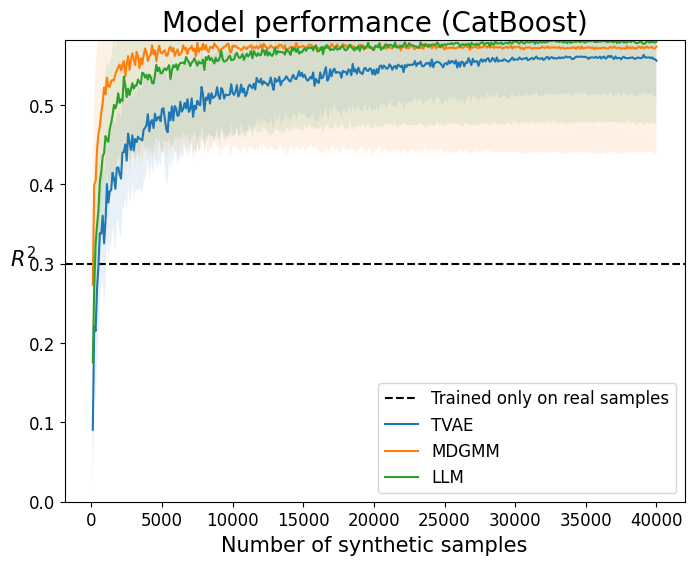

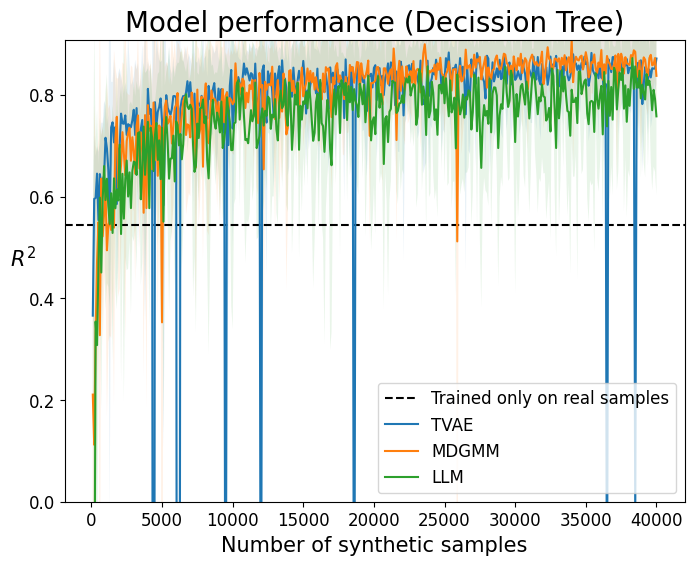

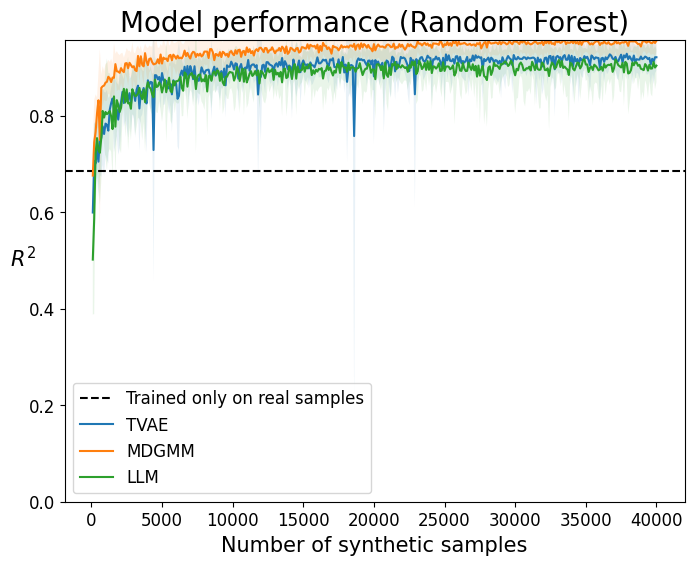

In [7]:
import matplotlib.pyplot as plt

metric_plot = "R2"
generation_methods = FOLDERS

def get_plot_list(results_out, generation_method, model_name, metric, number_order):
    average_list = []
    std_list= []
    for number in number_order:
        # print(number)
        # print(json.dumps(results_out[str(number)], sort_keys=True, indent=4))
        # break

        average_list.append(results_out[number][model_name][metric][generation_method]["average"])
        std_list.append(results_out[number][model_name][metric][generation_method]["std"])
    return np.array(average_list), np.array(std_list)


for i in range(len(problems_used)):
    model_name = problems_used[i]["model_name"]
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.title("Model performance ({})".format(better_names[model_name]), fontsize=20)
    real_average, real_std = get_plot_list(results_out, "real", model_name, metric_plot, numbers_all)
    plt.axhline(y = real_average[0], color = 'black', linestyle = '--', label="Trained only on real samples") 
    max_average = max(real_average)

    for generation_method in generation_methods:
        synthetic_average, synthetic_std = get_plot_list(results_out, generation_method, model_name, metric_plot, numbers_all)
        plt.plot(numbers_all, synthetic_average, label=better_names[generation_method])
        max_average = max(max_average, max(synthetic_average))
        # Plot the shaded region for mean ± std
        plt.fill_between(numbers_all, synthetic_average - synthetic_std, synthetic_average + synthetic_std, alpha=0.1)

    plt.ylim(0, max_average)
    plt.xlabel("Number of synthetic samples", fontsize=15)
    plt.ylabel(metrics_names[metric_plot], fontsize=15, rotation=0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)    
    plt.savefig("model_performance_{}.png".format(better_names[model_name]), dpi=300, bbox_inches="tight", pad_inches=0)
    plt.show()


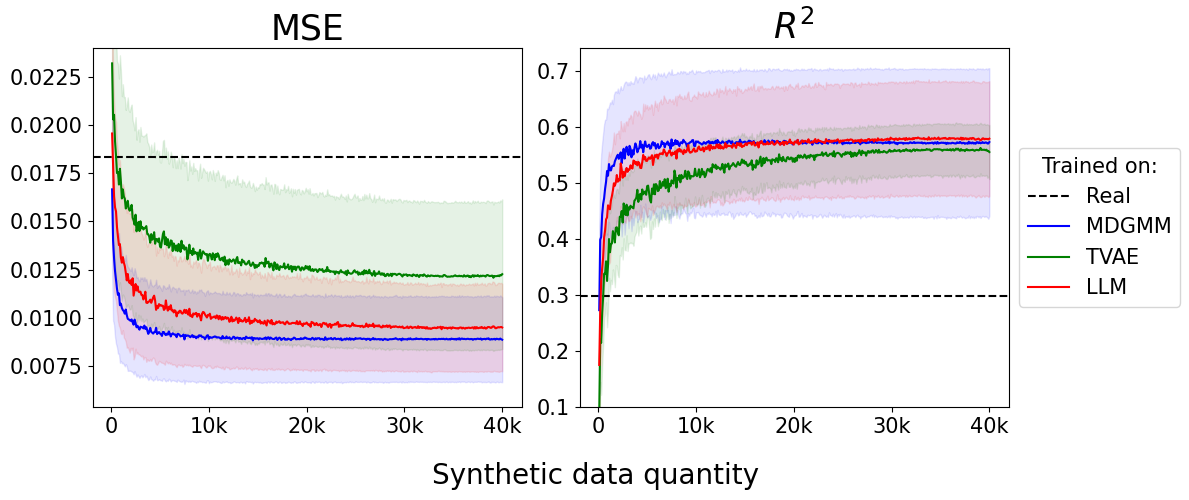

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fontsize = 25
metric_plots = ["MSE", "R2"]
generation_methods = ['dgmm', 'vae', 'llm']
colors = ["blue", "green", "red"]
def format_func(value, tick_number):
    # Convert value to kilo (k) if it is greater than or equal to 1000
    if value >= 1000:
        return f'{int(value // 1000)}k'
    else:
        return int(value)

def get_plot_list(results_out, generation_method, model_name, metric, number_order):
    average_list = []
    std_list= []
    for number in number_order:
        # print(number)
        # print(json.dumps(results_out[str(number)], sort_keys=True, indent=4))
        # break

        average_list.append(results_out[number][model_name][metric][generation_method]["average"])
        std_list.append(results_out[number][model_name][metric][generation_method]["std"])
    return np.array(average_list), np.array(std_list)

model_name = problems_used[0]["model_name"]
fig, axes = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharex=True)
# plt.suptitle("Model performance ({})\n".format(better_names[model_name]), fontsize=fontsize)
kk = 0
for metric_plot, ax in zip(metric_plots, axes):
    real_average, real_std = get_plot_list(results_out, "real", model_name, metric_plot, numbers_all)
    ax.axhline(y = real_average[0], color = 'black', linestyle = '--', label="Real") 
    max_average = max(real_average)
    min_average = min(real_average)

    for generation_method, color in zip(generation_methods, colors):
        synthetic_average, synthetic_std = get_plot_list(results_out, generation_method, model_name, metric_plot, numbers_all)
        ax.plot(numbers_all, synthetic_average, label=better_names[generation_method], color=color)
        max_average = max(max_average, max(synthetic_average))
        min_average = min(min_average, min(synthetic_average))
        # Plot the shaded region for mean ± std
        ax.fill_between(numbers_all, synthetic_average - synthetic_std, synthetic_average + synthetic_std, alpha=0.1, color=color)

    # ax.set_ylim(0, max_average)
    ax.set_title(metrics_names[metric_plot], fontsize=fontsize, rotation=0)
    # ax.set_xticks(fontsize=12)
    # ax.set_yticks(fontsize=12)
    # ax.set_legend(fontsize=12)    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    yl = ax.get_ylim()
    if not kk:
        ax.set_ylim((yl[0], 0.024))
        kk = 1
    else:
        ax.set_ylim((0.1, yl[1]))

    

fig.supxlabel("Synthetic data quantity", fontsize=20)

legend = plt.legend(title='Trained on:', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
legend.get_title().set_fontsize('15')
plt.tight_layout()
plt.savefig("model_performance_{}.png".format(better_names[model_name]), dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()
